# 1- Import All Library

In [15]:
import numpy as np #allow efficient mathematical operations on arrays.Used for numerical computations, linear algebra, and data manipulation.
import pandas as pd #provides data structures (Series and DataFrame) for handling and analyzing tabular data
import os
import matplotlib.pyplot as plt # for creating visualizations
import glob #Used for batch processing files with similar names or extensions
import nibabel as nib #neuroscience and medical imaging research.
import cv2 #rovides functions for image manipulation, feature extraction, and object detection
import imageio #for reading and writing image data, oading images into memory, creating animations, and saving visualizations
from tqdm.notebook import tqdm #Useful for tracking the progress of time-consuming operations (e.g., data processing, downloads).
from ipywidgets import * #for creating dynamic visualizations and interactive controls
from PIL import Image #for creating dynamic visualizations and interactive controls
from fastai.basics import * #for building custom models and working with data pipelines
from fastai.vision.all import * #for image classification, and segmentation
from fastai.data.transforms import * #provides various data transformation functions
import random #for simulations, shuffling data, and creating random samples
from matplotlib.pyplot import figure #Used for creating charts, histograms, scatter plots, and other types of graphs
import nibabel as nib #used for reading and writing NIfTI files
from sklearn.model_selection import train_test_split #to split a dataset into training and testing sets
from tensorflow.keras.layers import *#use to build the architecture of a neural network model.
from tensorflow.keras.models import Model #llows to create a model by specifying its inputs and outputs.
from tensorflow.keras.optimizers import Adam

# 2- Preprocessing

In [16]:
files=[]
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
      files.append((dirname, filename))

In [ ]:
# Create a DataFrame from the file list
df_files = pd.DataFrame(files, columns=['dirname', 'filename'])
df_files = df_files.sort_values(by='filename')
print(df_files.head())

                                                  dirname  \
182                                /kaggle/input/resnet50   
89   /kaggle/input/liver-tumor-segmentation/segmentations   
81   /kaggle/input/liver-tumor-segmentation/segmentations   
142  /kaggle/input/liver-tumor-segmentation/segmentations   
31   /kaggle/input/liver-tumor-segmentation/segmentations   

                 filename  
182   resnet50_weights.h5  
89     segmentation-0.nii  
81     segmentation-1.nii  
142   segmentation-10.nii  
31   segmentation-100.nii  


In [ ]:
# Map CT scan and label
df_files["mask_dirname"]  = ""
df_files["mask_filename"] = ""

for i in range(131):
    ct = f"volume-{i}.nii"
    mask = f"segmentation-{i}.nii"

    df_files.loc[df_files['filename'] == ct, 'mask_filename'] = mask
    df_files.loc[df_files['filename'] == ct, 'mask_dirname'] = "/kaggle/input/liver-tumor-segmentation/segmentations"
    
df_files = df_files[df_files.mask_filename != ''].sort_values(by=['filename']).reset_index(drop=True)

df_files

,dirname,filename,mask_dirname,mask_filename
0,/kaggle/input/liver-tumor-segmentation/volume_pt1,volume-0.nii,/kaggle/input/liver-tumor-segmentation/segmentations,segmentation-0.nii
1,/kaggle/input/liver-tumor-segmentation/volume_pt1,volume-1.nii,/kaggle/input/liver-tumor-segmentation/segmentations,segmentation-1.nii
2,/kaggle/input/liver-tumor-segmentation/volume_pt1,volume-10.nii,/kaggle/input/liver-tumor-segmentation/segmentations,segmentation-10.nii
3,/kaggle/input/liver-tumor-segmentation/volume_pt2,volume-11.nii,/kaggle/input/liver-tumor-segmentation/segmentations,segmentation-11.nii
4,/kaggle/input/liver-tumor-segmentation/volume_pt2,volume-12.nii,/kaggle/input/liver-tumor-segmentation/segmentations,segmentation-12.nii
5,/kaggle/input/liver-tumor-segmentation/volume_pt2,volume-13.nii,/kaggle/input/liver-tumor-segmentation/segmentations,segmentation-13.nii
6,/kaggle/input/liver-tumor-segmentation/volume_pt2,volume-14.nii,/kaggle/input/liver-tumor-segmentation/segmentations,segmentation-14.nii
7,/kaggle/input/liver-tumor-segmentation/volume_pt2,volume-15.nii,/kaggle/input/liver-tumor-segmentation/segmentations,segmentation-15.nii
8,/kaggle/input/liver-tumor-segmentation/volume_pt2,volume-16.nii,/kaggle/input/liver-tumor-segmentation/segmentations,segmentation-16.nii
9,/kaggle/input/liver-tumor-segmentation/volume_pt2,volume-17.nii,/kaggle/input/liver-tumor-segmentation/segmentations,segmentation-17.nii


# 3- Read 'nii' File 

In [ ]:
def read_nii(filepath):
    ct_scan = nib.load(filepath) 
    array = ct_scan.get_fdata()  
    array = np.rot90(np.array(array)) 
    return(array) 

sample = 40

sample_ct = read_nii(df_files.loc[sample,'dirname']+"/"+df_files.loc[sample,'filename'])

sample_mask = read_nii(df_files.loc[sample,'mask_dirname']+"/"+df_files.loc[sample,'mask_filename'])
print(f'CT Shape:   {sample_ct.shape}\nMask Shape: {sample_mask.shape}')


CT Shape:   (512, 512, 74)
Mask Shape: (512, 512, 74)


# 3.1- Preprocess the 'nii' file

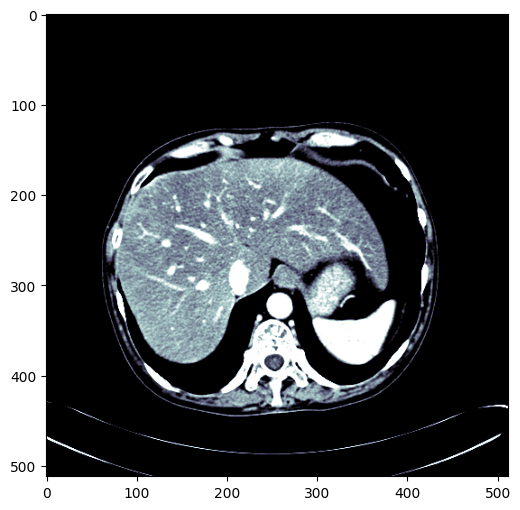

In [ ]:
#Preproceesing nii file using the functionality of PyTorch's
dicom_windows = types.SimpleNamespace(
    brain=(80,40),
    subdural=(254,100),
    stroke=(8,32),
    brain_bone=(2800,600),
    brain_soft=(375,40),
    lungs=(1500,-600),
    mediastinum=(350,50),
    abdomen_soft=(400,50),
    liver=(150,30),
    spine_soft=(250,50),
    spine_bone=(1800,400),
    custom = (200,60)
)
#This decorator is used to add a new method windowed to the Tensor class.
@patch
#The result is a tensor with pixel values scaled between 0 and 1, representing the windowed image.
def windowed(self:Tensor, w, l):
    px = self.clone()
    px_min = l - w//2
    px_max = l + w//2
    px[px<px_min] = px_min
    px[px>px_max] = px_max
    return (px-px_min) / (px_max-px_min)

figure(figsize=(8, 6), dpi=100)
#It appears you're applying the liver window settings (dicom_windows.liver) to the slice to visualize the liver tissue in the CT scan
plt.imshow(tensor(sample_ct[..., 55].astype(np.float32)).windowed(*dicom_windows.liver), cmap=plt.cm.bone);

# 3.2- Read 'nii' File and Show Original Data

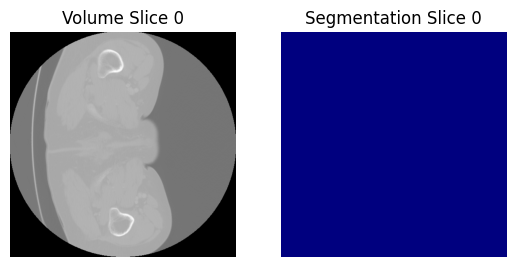

In [21]:
# this code read nii file and show original data

# Load the NIfTI file containing the volume
volume_nifti = nib.load('/kaggle/input/liver-tumor-segmentation/volume_pt1/volume-0.nii')

# Load the NIfTI file containing the segmentation image
segmentation_nifti = nib.load('/kaggle/input/liver-tumor-segmentation/segmentations/segmentation-0.nii')

# Extract the data arrays from the NIfTI files
volume_data = volume_nifti.get_fdata()
segmentation_data = segmentation_nifti.get_fdata()

# Choose a slice to display (e.g., slice 0 along the first axis)
slice_index = 0

# Plot the volume slice
plt.subplot(1, 2, 1)
plt.imshow(volume_data[..., slice_index], cmap='gray')
plt.title('Volume Slice {}'.format(slice_index))
plt.axis('off')

# Plot the segmentation slice
plt.subplot(1, 2, 2)
plt.imshow(segmentation_data[..., slice_index], cmap='jet')  # Adjust the colormap as needed
plt.title('Segmentation Slice {}'.format(slice_index))
plt.axis('off')

plt.show()

In [ ]:
def plot_sample(array_list, color_map = 'nipy_spectral'):
    '''
    Plots and a slice with all available annotations
    '''
    fig = plt.figure(figsize=(20,16), dpi=100)

    plt.subplot(1,4,1)
    plt.imshow(array_list[0], cmap='bone')
    plt.title('Original Image')
    plt.axis('off')
    plt.subplot(1,4,2)
    plt.imshow(tensor(array_list[0].astype(np.float32)).windowed(*dicom_windows.liver), cmap='bone');
    plt.title('Windowed Image')
    plt.axis('off')

    plt.subplot(1,4,3)
    plt.imshow(array_list[1], alpha=0.5, cmap=color_map)
    plt.title('Mask')
    plt.axis('off')

    plt.subplot(1,4,4)
    plt.imshow(array_list[0], cmap='bone')
    plt.imshow(array_list[1], alpha=0.5, cmap=color_map)
    plt.title('Liver & Mask')
    plt.axis('off')

    plt.show()

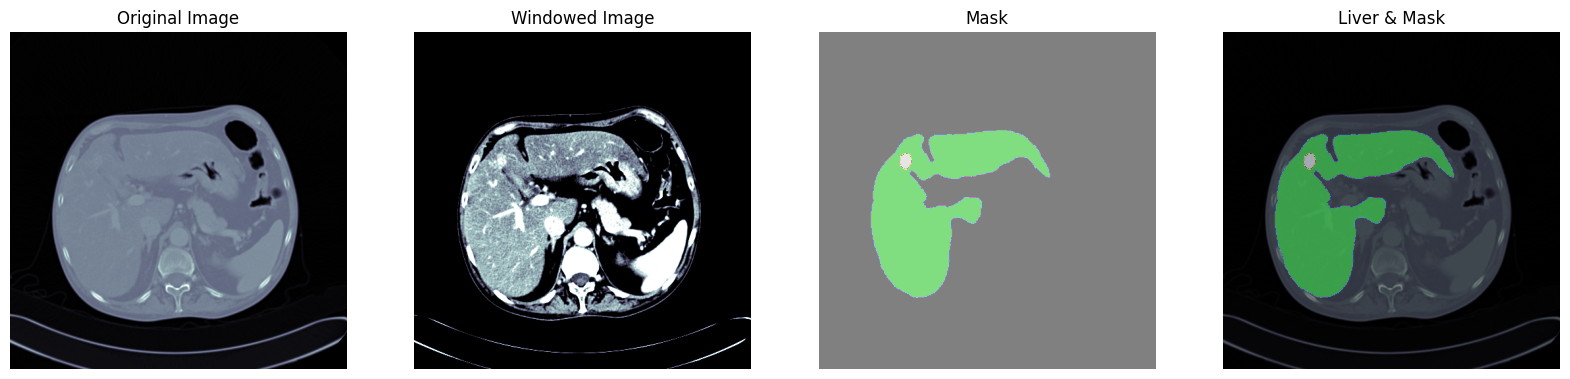

In [23]:
sample = 40

sample_slice = tensor(sample_ct[...,sample].astype(np.float32))

plot_sample([sample_ct[..., sample],
             sample_mask[..., sample]])

# 3.3- Preprocessing Functions

<Axes: >

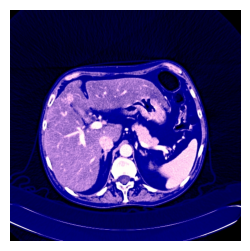

In [ ]:
# Preprocessing functions
class TensorCTScan(TensorImageBW): _show_args = {'cmap':'bone'} #a subclass of a PyTorch Tensor designed to handle black-and-white images.

@patch
def freqhist_bins(self:Tensor, n_bins=100):
    "A function to split the range of pixel values into groups, such that each group has around the same number of pixels"
    imsd = self.view(-1).sort()[0]
    t = torch.cat([tensor([0.001]),
                   torch.arange(n_bins).float()/n_bins+(1/2/n_bins),
                   tensor([0.999])])
    t = (len(imsd)*t).long()
    return imsd[t].unique()

@patch
def hist_scaled(self:Tensor, brks=None):
    "Scales a tensor using `freqhist_bins` to values between 0 and 1"
    if self.device.type=='cuda': return self.hist_scaled_pt(brks)
    if brks is None: brks = self.freqhist_bins()
    ys = np.linspace(0., 1., len(brks))
    x = self.numpy().flatten()
    x = np.interp(x, brks.numpy(), ys)
    return tensor(x).reshape(self.shape).clamp(0.,1.)


@patch
def to_nchan(x:Tensor, wins, bins=None):
    res = [x.windowed(*win) for win in wins]
    if not isinstance(bins,int) or bins!=0: res.append(x.hist_scaled(bins).clamp(0,1))
    dim = [0,1][x.dim()==3]
    return TensorCTScan(torch.stack(res, dim=dim))

@patch
def save_jpg(x:(Tensor), path, wins, bins=None, quality=120): #function to convert the tensor to a multi-channel image suitable for saving as a JPG.The image is saved with the specified quality.
    fn = Path(path).with_suffix('.jpg')
    x = (x.to_nchan(wins, bins)*255).byte()
    im = Image.fromarray(x.permute(1,2,0).numpy(), mode=['RGB','CMYK'][x.shape[0]==4])
    im.save(fn, quality=quality)

_,axs = subplots(1,1)

sample_slice.save_jpg('test.jpg', [dicom_windows.liver, dicom_windows.custom])
show_image(Image.open('test.jpg'), ax=axs[0], figsize=(8, 6))

# 4- Generate *Unet Training* Image From 'nii' File

In [ ]:
GENERATE_JPG_FILES = True

if GENERATE_JPG_FILES:

    path = Path(".")

    os.makedirs('train_images', exist_ok=True)
    os.makedirs('train_masks', exist_ok=True)

    ## test folder
    os.makedirs('test_images', exist_ok=True)
    os.makedirs('test_masks', exist_ok=True)

    train_df, test_df = train_test_split(df_files, test_size=0.1, random_state=42)
    print("Length of train_df:", len(train_df))
    train_df = train_df.reset_index(drop=True)
    print("Length of test_df:", len(test_df))
    test_df = test_df.reset_index(drop=True)

    for ii in tqdm(range(len(train_df))):
        curr_ct = read_nii(train_df.loc[ii, 'dirname'] + "/" + train_df.loc[ii, 'filename'])
        curr_mask = read_nii(train_df.loc[ii, 'mask_dirname'] + "/" + train_df.loc[ii, 'mask_filename'])
        curr_file_name = str(train_df.loc[ii, 'filename']).split('.')[0]
        curr_dim = curr_ct.shape[2]

        for curr_slice in range(0, curr_dim, 2):
            data = tensor(curr_ct[..., curr_slice].astype(np.float32))
            mask = Image.fromarray(curr_mask[..., curr_slice].astype('uint8'), mode="L")
            data.save_jpg(f"train_images/{curr_file_name}_slice_{curr_slice}.jpg", [dicom_windows.liver, dicom_windows.custom])
            mask.save(f"train_masks/{curr_file_name}_slice_{curr_slice}_mask.png")

    for ii in tqdm(range(len(test_df))):
        curr_ct = read_nii(test_df.loc[ii, 'dirname'] + "/" + test_df.loc[ii, 'filename'])
        curr_mask = read_nii(test_df.loc[ii, 'mask_dirname'] + "/" + test_df.loc[ii, 'mask_filename'])
        curr_file_name = str(test_df.loc[ii, 'filename']).split('.')[0]
        curr_dim = curr_ct.shape[2]

        for curr_slice in range(0, curr_dim, 2):
            data = tensor(curr_ct[..., curr_slice].astype(np.float32))
            mask = Image.fromarray(curr_mask[..., curr_slice].astype('uint8'), mode="L")
            data.save_jpg(f"test_images/{curr_file_name}_slice_{curr_slice}.jpg", [dicom_windows.liver, dicom_windows.custom])
            mask.save(f"test_masks/{curr_file_name}_slice_{curr_slice}_mask.png")

else:
    path = Path("../input/liver-segmentation-with-fastai-v2")  

Length of train_df: 45
Length of test_df: 6


  0%|          | 0/45 [00:00<?, ?it/s]

pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1


  0%|          | 0/6 [00:00<?, ?it/s]

pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1
pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1


# 4.1- Show Data

In [26]:
print("\nFirst few rows of Training Set:")
print(train_df.head())

print("\nFirst few rows of Testing Set:")
print(test_df.head())


First few rows of Training Set:
                                             dirname       filename  \
0  /kaggle/input/liver-tumor-segmentation/volume_pt3  volume-24.nii   
1  /kaggle/input/liver-tumor-segmentation/volume_pt4  volume-38.nii   
2  /kaggle/input/liver-tumor-segmentation/volume_pt2  volume-11.nii   
3  /kaggle/input/liver-tumor-segmentation/volume_pt4  volume-36.nii   
4  /kaggle/input/liver-tumor-segmentation/volume_pt2  volume-20.nii   

                                           mask_dirname        mask_filename  
0  /kaggle/input/liver-tumor-segmentation/segmentations  segmentation-24.nii  
1  /kaggle/input/liver-tumor-segmentation/segmentations  segmentation-38.nii  
2  /kaggle/input/liver-tumor-segmentation/segmentations  segmentation-11.nii  
3  /kaggle/input/liver-tumor-segmentation/segmentations  segmentation-36.nii  
4  /kaggle/input/liver-tumor-segmentation/segmentations  segmentation-20.nii  

First few rows of Testing Set:
                                  

In [27]:
print("\ntrain df data shape:")
print(train_df.shape)


train df data shape:
(45, 4)


In [28]:
print("\ntest df data shape:")
print(test_df.shape)


test df data shape:
(6, 4)


# 5- Resizing Images

In [ ]:
# Set the directories
train_images_dir = '/kaggle/working/train_images'
train_masks_dir = '/kaggle/working/train_masks'

all_image_file_names = sorted(os.listdir(train_images_dir))
sample_size = min(9000, len(all_image_file_names))
selected_image_file_names = random.sample(all_image_file_names, sample_size)
target_size = (128, 128)
train_images = [np.array(Image.open(os.path.join(train_images_dir, fname)).resize(target_size)) for fname in selected_image_file_names]
mask_file_names = [fname.replace('.jpg', '_mask.png') for fname in selected_image_file_names]
train_masks = [np.array(Image.open(os.path.join(train_masks_dir, fname)).resize(target_size)) for fname in mask_file_names]

train_images = np.array(train_images)
train_masks = np.array(train_masks)
train_images =train_images / 255.0
train_masks =train_masks.reshape((train_masks.shape[0], train_masks.shape[1], train_masks.shape[2], 1))

In [ ]:
test_images_dir = '/kaggle/working/test_images'
test_masks_dir = '/kaggle/working/test_masks'
all_image_file_names = sorted(os.listdir(test_images_dir))
sample_size = min(9000, len(all_image_file_names))

selected_image_file_names = random.sample(all_image_file_names, sample_size)
target_size = (128, 128)
test_images = [np.array(Image.open(os.path.join(test_images_dir, fname)).resize(target_size)) for fname in selected_image_file_names]
mask_file_names = [fname.replace('.jpg', '_mask.png') for fname in selected_image_file_names]
test_masks = [np.array(Image.open(os.path.join(test_masks_dir, fname)).resize(target_size)) for fname in mask_file_names]
test_images = np.array(test_images)
test_masks = np.array(test_masks)
test_images =test_images / 255.0
test_masks =test_masks.reshape((test_masks.shape[0], test_masks.shape[1], test_masks.shape[2], 1))

In [31]:
print(f"Train image ={len(train_images)} Test image={len(test_images)}")
print(f"Train mask ={len(train_masks)}  Test mask={len(test_masks)}")

Train image =8556 Test image=699
Train mask =8556  Test mask=699


# 6- Split Data Train Test and Validation

In [32]:
x_valid, x_test, y_valid, y_test = train_test_split(test_images, test_masks, test_size=1/3, random_state=42)

In [33]:
print(f"train image={train_images.shape} and train_masks={train_masks.shape}")
print(f"X valid shape ={x_valid.shape} x_test={x_test.shape}")
print(f"y valid shape ={y_valid.shape}  y_test={y_test.shape}")

train image=(8556, 128, 128, 3) and train_masks=(8556, 128, 128, 1)
X valid shape =(466, 128, 128, 3) x_test=(233, 128, 128, 3)
y valid shape =(466, 128, 128, 1)  y_test=(233, 128, 128, 1)


# 6.1- Display Random Images and Masks

In [ ]:
def display_images_and_masks(images, masks, num_samples=2):
    sample_indices = random.sample(range(images.shape[0]), num_samples)
    for i in range(num_samples):
        index = sample_indices[i] 
        plt.subplot(num_samples, 2, 2 * i + 1)  
        plt.imshow(images[index]) 
        plt.title("Image {}".format(index)) 
        plt.axis("off") 
        
        plt.subplot(num_samples, 2, 2 * i + 2) 
        plt.imshow(masks[index].squeeze(), cmap='gray')  
        plt.title("Mask {}".format(index))  
        plt.axis("off")  
    
    plt.show()


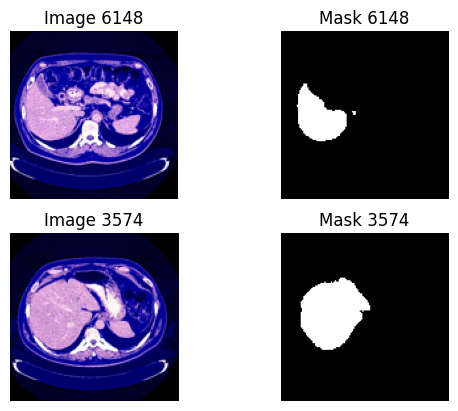

In [ ]:
display_images_and_masks(train_images, train_masks)

# ----> Transfer Learning by ResNet50 Model

# 7- Model Training

# 7.1 - ResNet50 Model

In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, UpSampling2D

def build_model(input_shape=(128, 128, 3), num_classes=1, weights_path=None):
    # Load the ResNet50 model with the option to load pre-trained weights and excluding the top (fully connected) layers.
    base_model = ResNet50(weights=weights_path, include_top=False, input_tensor=Input(shape=input_shape))

    # Freeze the layers of the base model to prevent them from being updated during training.
    for layer in base_model.layers:
        layer.trainable = False

    x = base_model.output

    x = UpSampling2D((2, 2))(x)  
    x = Conv2D(512, (3, 3), activation='relu', padding='same')(x)  
    x = UpSampling2D((2, 2))(x)  
    x = Conv2D(256, (3, 3), activation='relu', padding='same')(x)  
    x = UpSampling2D((2, 2))(x) 
    x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = UpSampling2D((2, 2))(x)
    x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = UpSampling2D((2, 2))(x)
    x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)

    # Add the final convolutional layer with a filter for each class (in this case, binary, so only 1 filter).
    x = Conv2D(num_classes, (1, 1), activation='sigmoid')(x)

    model = Model(inputs=base_model.input, outputs=x)
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model


In [ ]:
#calling the build_model function to create a new model based on the ResNet50 architecture
model = build_model(weights_path='/kaggle/input/resnet50/resnet50_weights.h5')

In [ ]:
history = model.fit(train_images, train_masks, batch_size=32, epochs=10, validation_data=(x_valid, y_valid))


# 7.2 - Plot Training & Validation Loss Values

In [ ]:
def plot_history(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()


In [ ]:
plot_history(history)

# 7.3 - Evaluate, Prediction & Score

In [ ]:
scores = model.evaluate(x_valid, y_valid)
# 'scores' is a list containing the loss as the first element and the accuracy as the second element.
# By accessing 'scores[1]', we retrieve the accuracy of the model on the validation dataset.
accuracy = scores[1]


In [ ]:
prediction = model.predict(x_test)
prediction = model.predict(x_test)
# 'prediction' will contain the output predictions for each input image in 'x_test'.
# For a segmentation model, this would typically be a mask indicating the segmented areas.


In [ ]:
test_scores = model.evaluate(x_test, y_test)
# test_scores is a list that contains the loss as the first element and the accuracy as the second element.
# Here, we are accessing the second element, which is the accuracy of the model on the test data.
accuracy = test_scores[1]


In [ ]:
image_index = 44
input_image = x_test[image_index]
true_mask = y_test[image_index]

predicted_mask = model.predict(np.expand_dims(input_image, axis=0))[0]

threshold = 0.5  
predicted_mask_binary = (predicted_mask > threshold).astype(np.uint8)

plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(input_image)
plt.title('Original Image')

plt.subplot(1, 3, 2)
plt.imshow(true_mask[:, :, 0], cmap='gray')
plt.title('True Mask')

plt.subplot(1, 3, 3)
plt.imshow(predicted_mask_binary, cmap='gray')
plt.title('Predicted Mask')

plt.show()

In [ ]:
initial_segmentation_results = model.predict(x_test)

# 8 - U-Net Model

In [ ]:
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

def unet_model(input_layer):
    # Encoder
    conv1 = Conv2D(64, (3, 3), activation='relu', padding='same')(input_layer)
    # First pooling layer reduces spatial dimensions by half (downsampling)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
    
    # Second convolutional block with 128 filters, following the downsampling
    conv2 = Conv2D(128, (3, 3), activation='relu', padding='same')(pool1)
    # Second pooling layer continues to reduce dimensions
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
    
    # Decoder
    conv3 = Conv2D(128, (3, 3), activation='relu', padding='same')(pool2)
    # Upsampling layer to increase the spatial dimensions to match those of conv2
    up1 = UpSampling2D((2, 2))(conv3)
    # Concatenation layer merges feature maps from encoder (conv2) with upsampled maps, crucial for U-Net architecture
    concat1 = concatenate([conv2, up1], axis=-1)
    
    conv4 = Conv2D(64, (3, 3), activation='relu', padding='same')(concat1)
    # Final upsampling to increase the dimensions to match those of conv1
    up2 = UpSampling2D((2, 2))(conv4)
    # Final concatenation with the very first convolutional layer outputs
    concat2 = concatenate([conv1, up2], axis=-1)
    
    outputs = Conv2D(1, (1, 1), activation='sigmoid')(concat2)
    model = Model(inputs=input_layer, outputs=outputs)
    return model

input_layer = Input(shape=(128, 128, 3), name='input_layer_1')
unet_model = unet_model(input_layer)

unet_model.compile(optimizer=Adam(learning_rate=1e-4), loss='binary_crossentropy', metrics=['accuracy'])

unet_model.fit(train_images, train_masks, batch_size=32, epochs=10, validation_data=(x_valid, y_valid))


Epoch 1/10
268/268 ━━━━━━━━━━━━━━━━━━━━ 994s 4s/step - accuracy: 0.9762 - loss: 0.2301 - val_accuracy: 0.9854 - val_loss: 0.0377
Epoch 2/10
268/268 ━━━━━━━━━━━━━━━━━━━━ 938s 4s/step - accuracy: 0.9860 - loss: 0.0372 - val_accuracy: 0.9864 - val_loss: 0.0336
Epoch 3/10
268/268 ━━━━━━━━━━━━━━━━━━━━ 942s 4s/step - accuracy: 0.9867 - loss: 0.0337 - val_accuracy: 0.9874 - val_loss: 0.0303
Epoch 4/10
268/268 ━━━━━━━━━━━━━━━━━━━━ 949s 4s/step - accuracy: 0.9872 - loss: 0.0313 - val_accuracy: 0.9875 - val_loss: 0.0295
Epoch 5/10
268/268 ━━━━━━━━━━━━━━━━━━━━ 992s 4s/step - accuracy: 0.9880 - loss: 0.0290 - val_accuracy: 0.9882 - val_loss: 0.0281
Epoch 6/10
268/268 ━━━━━━━━━━━━━━━━━━━━ 943s 4s/step - accuracy: 0.9880 - loss: 0.0288 - val_accuracy: 0.9885 - val_loss: 0.0270
Epoch 7/10
268/268 ━━━━━━━━━━━━━━━━━━━━ 945s 4s/step - accuracy: 0.9888 - loss: 0.0263 - val_accuracy: 0.9882 - val_loss: 0.0297
Epoch 8/10
268/268 ━━━━━━━━━━━━━━━━━━━━ 939s 4s/step - accuracy: 0.9891 - loss: 0.0256 - val_accu

# 8.1 - Evaluate Refined Segmentation Results

In [ ]:
evaluation = unet_model.evaluate(x_test, y_test)

8/8 ━━━━━━━━━━━━━━━━━━━━ 8s 955ms/step - accuracy: 0.9882 - loss: 0.0279


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 306ms/step


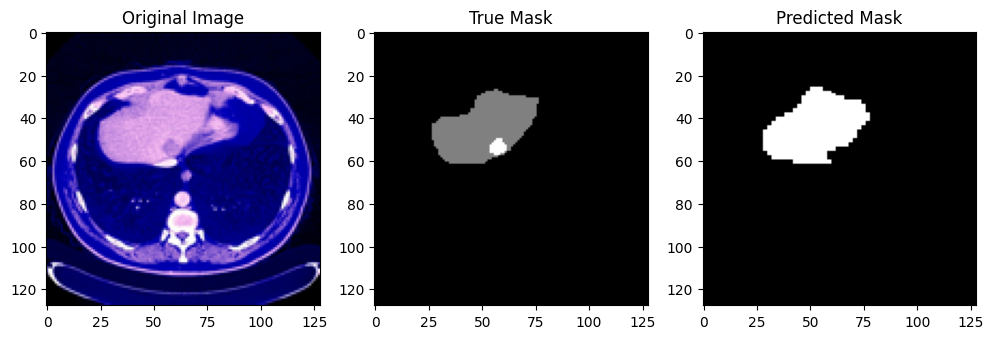

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

image_index = 45
input_image = x_test[image_index] 
true_mask = y_test[image_index]   

predicted_mask = unet_model.predict(np.expand_dims(input_image, axis=0))[0]  

threshold = 0.5  
predicted_mask_binary = (predicted_mask > threshold).astype(np.uint8)  

plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.imshow(input_image)  
plt.title('Original Image')  

plt.subplot(1, 3, 2)
plt.imshow(true_mask[:, :, 0], cmap='gray')  
plt.title('True Mask') 

plt.subplot(1, 3, 3)
plt.imshow(predicted_mask_binary[:, :, 0], cmap='gray')  
plt.title('Predicted Mask')  
plt.show()


In [ ]:
unet_model.save('unet_model.h5')